In [33]:
#Importing matplotlib and numpy as they will be required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
import json
import seaborn as sns

In [34]:
# load json as string
openfile=open('data/ultimate_data_challenge.json')
jsondata=json.load(openfile)
data=pd.DataFrame(jsondata)

print(data.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [36]:
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [37]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [38]:
print(min(data['signup_date']))
print(max(data['signup_date']))

2014-01-01 00:00:00
2014-01-31 00:00:00


In [39]:
print(min(data['last_trip_date']))
print(max(data['last_trip_date']))

2014-01-01 00:00:00
2014-07-01 00:00:00


In [40]:
#Sign-up data
sign_up_data = pd.DataFrame(data['signup_date'])
sign_up_data['signup_count'] = 1
sign_up_data.set_index('signup_date',inplace=True)
sign_up_data.head()

,signup_count
signup_date,
2014-01-25,1
2014-01-29,1
2014-01-06,1
2014-01-10,1
2014-01-27,1


In [41]:
signup_data_daily = sign_up_data.groupby('signup_date').sum()

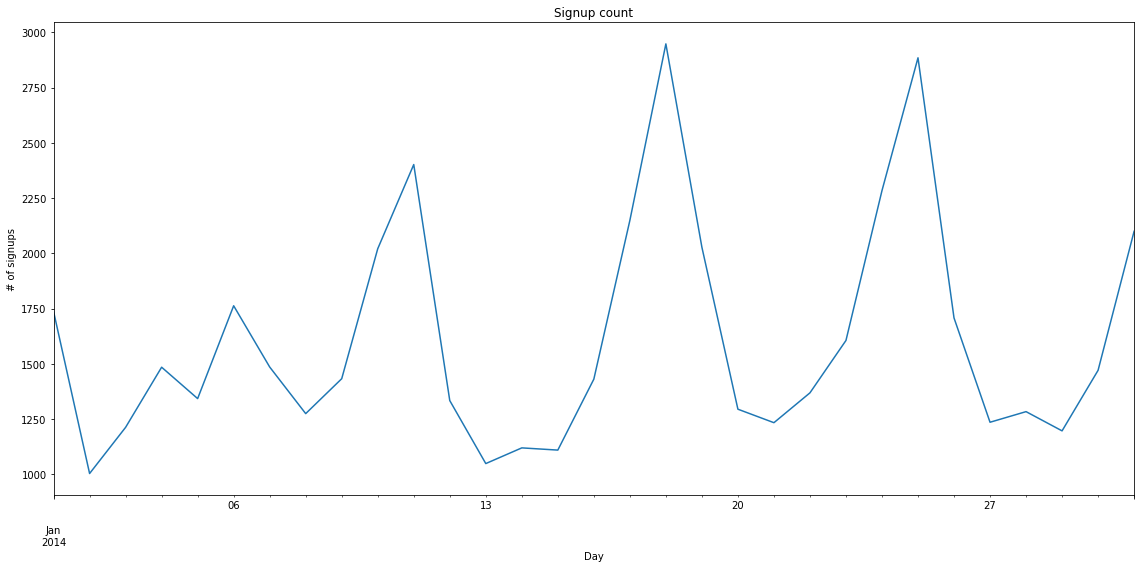

In [42]:
fig, ax = plt.subplots(figsize=(16,8));

signup_data_daily['signup_count'].plot(ax=ax);

ax.set_title('Signup count');
ax.set_ylabel('# of signups');
ax.set_xlabel('Day');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [43]:
#Last trip data
last_trip_data = pd.DataFrame(data['last_trip_date'])
last_trip_data['last_trip_count'] = 1
last_trip_data.set_index('last_trip_date',inplace=True)
last_trip_data.head()

,last_trip_count
last_trip_date,
2014-06-17,1
2014-05-05,1
2014-01-07,1
2014-06-29,1
2014-03-15,1


In [44]:
last_trip_data_daily = last_trip_data.groupby('last_trip_date').sum()

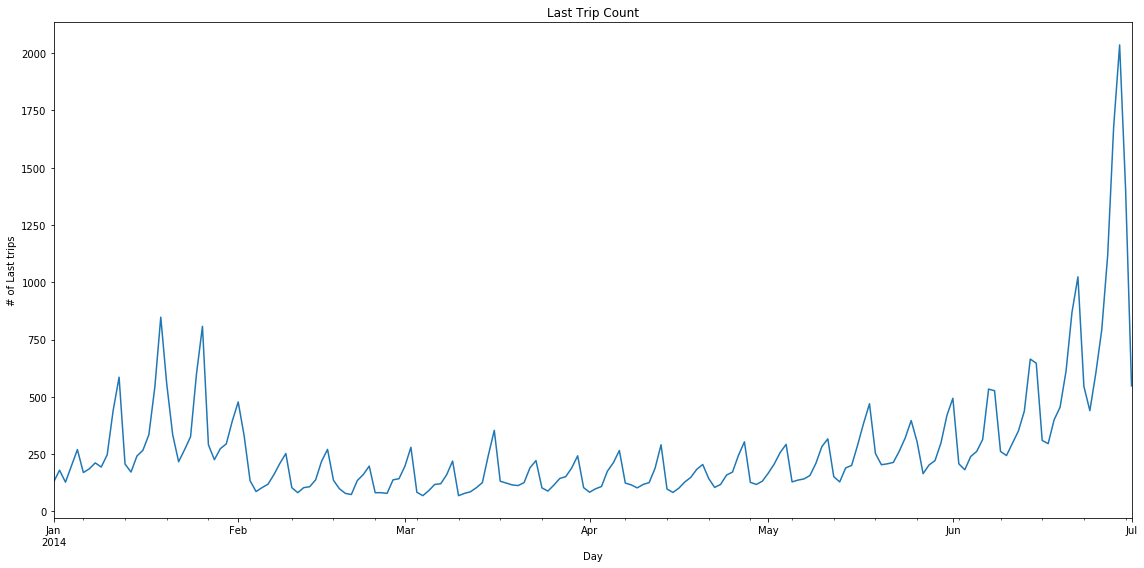

In [45]:
fig, ax = plt.subplots(figsize=(16,8));

last_trip_data_daily['last_trip_count'].plot(ax=ax);

ax.set_title('Last Trip Count');
ax.set_ylabel('# of Last trips');
ax.set_xlabel('Day');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [46]:
#Set month of June as filter for active users
data['Active_user'] = np.where(data['last_trip_date']>'2014-06-01', 1, 0)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [47]:
data['Active_user'].value_counts(normalize=True)

0    0.6338
1    0.3662
Name: Active_user, dtype: float64

In [48]:
#fill Nan values

data['avg_rating_by_driver'].fillna(value=data['avg_rating_by_driver'].mean(), inplace=True)
data['avg_rating_of_driver'].fillna(value=data['avg_rating_of_driver'].mean(), inplace=True)
data['phone'].fillna(value="Unknown", inplace=True)

data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Active_user
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
Active_user               50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB


In [50]:
print(data.city.unique())
print(data.phone.unique())

["King's Landing" 'Astapor' 'Winterfell']
['iPhone' 'Android' 'Unknown']


In [51]:
#Prepare data for machine learning algorith - 
#encoding city
city_cat = data[['city']]
phone_cat = data[['phone']]
print(city_cat.head(5))
print(phone_cat.head(5))

             city
0  King's Landing
1         Astapor
2         Astapor
3  King's Landing
4      Winterfell
     phone
0   iPhone
1  Android
2   iPhone
3   iPhone
4  Android


In [52]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data['city_encoded'] = ordinal_encoder.fit_transform(city_cat)
data['phone_encoded'] = ordinal_encoder.fit_transform(phone_cat)
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Active_user,city_encoded,phone_encoded
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,1.0,2.0
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0.0,0.0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,0.0,2.0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,1.0,2.0
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,2.0,0.0
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1,2.0,2.0
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0,0.0,0.0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0,2.0,2.0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0,2.0,0.0
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0,2.0,0.0


In [53]:
list(data.columns)

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct',
 'Active_user',
 'city_encoded',
 'phone_encoded']

In [54]:
#Pick features
features_list = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge',
 'city_encoded', 'phone_encoded','surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']
features = data[features_list]
features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_encoded,phone_encoded,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1.0,2.0,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,0.0,0.0,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,0.0,2.0,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,1.0,2.0,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,2.0,0.0,11.8,14,False,82.4


In [55]:
#Target variable - Active user
target= data['Active_user']

In [56]:
#Get test and train sets
def split_train_test(data, train_ratio):
    indices = np.arange(len(data))
    train_set_size = int(len(data) * train_ratio)
    train_indices = indices[:train_set_size]
    test_indices = indices[train_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

X_train_set, X_test_set = split_train_test(features, 0.8)

In [57]:
print(len(X_train_set))
print(len(X_test_set))
print("Training Series:", "\n", X_train_set.head(), "\n")
print("Training Series:", "\n", X_train_set.tail(), "\n")
print("Testing Series:", "\n", X_test_set.head())
print("Testing Series:", "\n", X_test_set.tail())

40000
10000
Training Series: 
    avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

   city_encoded  phone_encoded  surge_pct  trips_in_first_30_days  \
0           1.0            2.0       15.4                       4   
1           0.0            0.0        0.0                       0   
2           0.0            2.0        0.0                       3   
3           1.0            2.0       20.0                       9   
4           2.0            0.0       11.8                      14   

   ultimate_black_user  weekday_pct  
0                 True         46.2  
1                False         50.0  
2                Fa

In [58]:
y_train_set, y_test_set = split_train_test(target, 0.8)

In [59]:
#SKIP
print(len(y_train_set))
print(len(y_test_set))
print("Training Series:", "\n", y_train_set.head(), "\n")
print("Training Series:", "\n", y_train_set.tail(), "\n")
print("Testing Series:", "\n", y_test_set.head())
print("Testing Series:", "\n", y_test_set.tail())

40000
10000
Training Series: 
 0    1
1    0
2    0
3    1
4    0
Name: Active_user, dtype: int32 

Training Series: 
 39995    0
39996    1
39997    0
39998    1
39999    1
Name: Active_user, dtype: int32 

Testing Series: 
 40000    0
40001    1
40002    0
40003    0
40004    0
Name: Active_user, dtype: int32
Testing Series: 
 49995    1
49996    0
49997    0
49998    0
49999    0
Name: Active_user, dtype: int32


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
#model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [10, 20, 30, 40, 50]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro')


CV_rfc.fit(X_train_set,y_train_set.values.ravel())
y_model = CV_rfc.predict(X_test_set)

In [61]:
print (CV_rfc.best_params_)
print (CV_rfc.best_score_)

{'max_features': 'auto', 'min_samples_split': 30, 'n_estimators': 300}
0.7675097856970189


In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test_set, y_model))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      6410
           1       0.68      0.75      0.71      3590

   micro avg       0.78      0.78      0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.79      0.78      0.79     10000



[[5160 1250]
 [ 902 2688]]


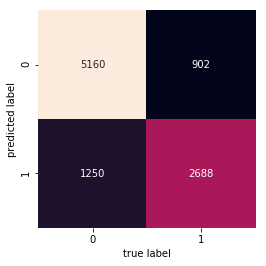

In [63]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_set, y_model)
print(mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [64]:
# Get numerical feature importances

importances = list(CV_rfc.best_estimator_.feature_importances_)
feature_list = list(features.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: avg_rating_by_driver Importance: 0.16
Variable: avg_dist             Importance: 0.15
Variable: weekday_pct          Importance: 0.13
Variable: city_encoded         Importance: 0.12
Variable: surge_pct            Importance: 0.12
Variable: phone_encoded        Importance: 0.08
Variable: avg_surge            Importance: 0.07
Variable: trips_in_first_30_days Importance: 0.07
Variable: avg_rating_of_driver Importance: 0.05
Variable: ultimate_black_user  Importance: 0.05
